In [7]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn import tree, datasets

from tp_arbres_source import (rand_gauss, rand_bi_gauss, rand_tri_gauss,
                              rand_checkers, rand_clown, plot_2d,
                              frontiere, frontiere_new)

import seaborn as sns
from matplotlib import rc

import os
from sklearn.externals.six import StringIO
# import pydotplus

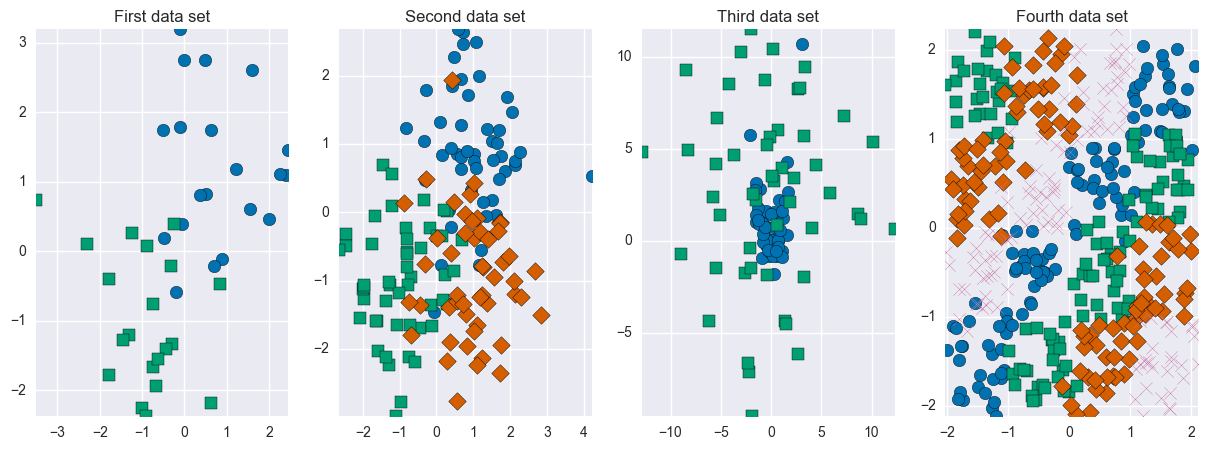

In [2]:
############################################################################
# Data Generation: example
############################################################################

np.random.seed(1)

n = 100
mu = [1., 1.]
sigma = [1., 1.]
rand_gauss(n, mu, sigma)


n1 = 20
n2 = 20
mu1 = [1., 1.]
mu2 = [-1., -1.]
sigma1 = [0.9, 0.9]
sigma2 = [0.9, 0.9]
data1 = rand_bi_gauss(n1, n2, mu1, mu2, sigma1, sigma2)

n1 = 50
n2 = 50
n3 = 50
mu1 = [1., 1.]
mu2 = [-1., -1.]
mu3 = [1., -1.]
sigma1 = [0.9, 0.9]
sigma2 = [0.9, 0.9]
sigma3 = [0.9, 0.9]
data2 = rand_tri_gauss(n1, n2, n3, mu1, mu2, mu3, sigma1, sigma2, sigma3)

n1 = 50
n2 = 50
sigma1 = 1.
sigma2 = 5.
data3 = rand_clown(n1, n2, sigma1, sigma2)


n1 = 114  # XXX : change
n2 = 114
n3 = 114
n4 = 114
sigma = 0.1
data4 = rand_checkers(n1, n2, n3, n4, sigma)

############################################################################
# Displaying labeled data
############################################################################

plt.close("all")
plt.ion()
plt.figure(1, figsize=(15, 5))
plt.subplot(141)
plt.title('First data set')
plot_2d(data1[:, :2], data1[:, 2], w=None)

plt.subplot(142)
plt.title('Second data set')
plot_2d(data2[:, :2], data2[:, 2], w=None)

plt.subplot(143)
plt.title('Third data set')
plot_2d(data3[:, :2], data3[:, 2], w=None)

plt.subplot(144)
plt.title('Fourth data set')
plot_2d(data4[:, :2], data4[:, 2], w=None)

c:\program files\python35\lib\site-packages\ipykernel\__main__.py:17: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
c:\program files\python35\lib\site-packages\ipykernel\__main__.py:18: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
c:\program files\python35\lib\site-packages\ipykernel\__main__.py:19: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
c:\program files\python35\lib\site-packages\ipykernel\__main__.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


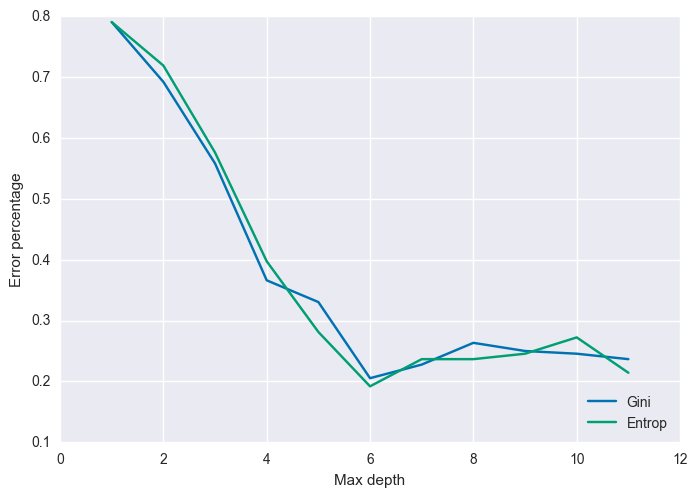

In [3]:

############################################
# ARBRES
############################################


# Q2. Créer un objet 'arbre de décision' en spécifiant le critère de
# classification comme l'indice de gini ou l'entropie, avec la
# fonction 'DecisionTreeClassifier' du module 'tree'.



# Effectuer la classification d'un jeu de données simulées

data = data4
n=data.shape[0]
X_train = data4[:n/2, :2]
Y_train = data4[:n/2, 2]
X_test = data4[n/2:, :2]
Y_test = data4[n/2:, 2]

# Afficher les scores en fonction du paramètre max_depth
# The maximum depth of the tree. If None, then nodes are expanded until all leaves are pure or until all leaves contain less than min_samples_split samples.
dmax = 12
scores = np.zeros([dmax-1,2])
plt.close(2)
plt.figure(2)

for i in range(1,dmax):
    # XXX : TODO
    dt = tree.DecisionTreeClassifier(criterion='gini', max_depth=i)
    dt.fit(X_train, Y_train)
    scores[i-1,0]=dt.score(X_test, Y_test)
    dt = tree.DecisionTreeClassifier(criterion='entropy', max_depth=i)
    dt.fit(X_train, Y_train)
    scores[i-1,1]=dt.score(X_test, Y_test)

# print(scores)
plt.plot(range(1,dmax),1-scores[:,0],label='Gini')
plt.plot(range(1,dmax),1-scores[:,1],label='Entrop')

# plt.close(3)
# plt.figure(3)
# plt.plot(...)  # TODO
plt.xlabel('Max depth')
plt.ylabel('Error percentage')
plt.legend(loc=4)
plt.show()

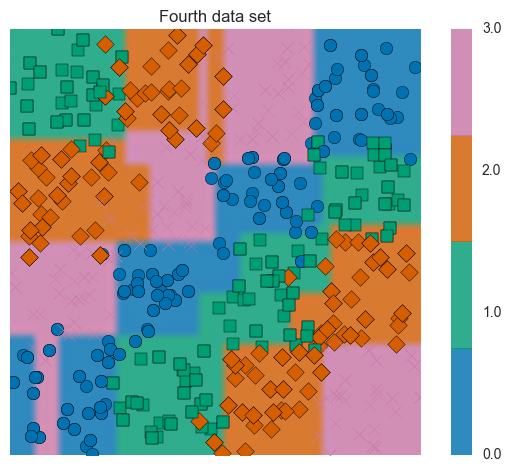

In [4]:
# Q3 Afficher les frontières obtenues avec l'arbre pour le meilleur paramètre

# TODO
dt = tree.DecisionTreeClassifier(criterion='entropy', max_depth=6)
dt.fit(X_train, Y_train)

def f1(xx):
    return dt.predict(xx.reshape(1,-1))

plt.figure(2)
plt.title('Fourth data set')
plot_2d(data4[:, :2], data4[:, 2], w=None)
frontiere_new(f1, X_test, Y_test , step=50)

In [9]:
# Q4.  Exporter la représentation graphique de l'arbre
# tree.export_graphviz(dt, out_file="myTestTree.dot", filled=True)
# import os
# os.system("dot -Tpdf myTestTree.dot -o myTestTree.pdf")
# !open myTestTree.pdf
# os.system("evince myTestTree.pdf")

In [ ]:
# Q5 : Génération de base de test

# # data_test = rand_checkers(...
# X_test = data_test[:, :2]
# Y_test = data_test[:, 2].astype(int)

dmax = 12
scores = np.zeros(dmax)
plt.close(5)
plt.figure(5, figsize=(15, 10))

for i in range(dmax):
    # TODO

plt.close(6)
plt.figure(6)
# plt.plot(...)  # TODO
plt.xlabel('Max depth')
plt.ylabel('Accuracy Score')
print(scores)

In [ ]:
# Q6. même question avec les données de reconnaissances de texte 'digits'

# Import the digits dataset
digits = datasets.load_digits()

n_samples = len(digits.data)
X = digits.data[:n_samples // 2]  # digits.images.reshape((n_samples, -1))
Y = digits.target[:n_samples // 2]
X_test = digits.data[n_samples // 2:]
Y_test = digits.target[n_samples // 2:]

# TODO

In [ ]:
# Q7. estimer la meilleur profondeur avec un cross_val_score

# TODO

In [ ]:
############################################################################
# Regression logistique
############################################################################

# Q8. à Q12 appliquer la régression logistique aux digits

from sklearn import linear_model

symlist = ['o', 's', 'D', '+', 'x', '*', 'p', 'v', '-', '^']
collist = ['blue', 'grey', 'red', 'purple', 'orange', 'salmon', 'black',
           'fuchsia']

logreg = linear_model.LogisticRegression()

# TODO

In [16]:
data[:100]

array([[ 2.0150916 , -1.08920806,  3.        ],
       [-0.51266854, -1.7837039 ,  1.        ],
       [-1.32452988,  0.10175416,  2.        ],
       [-1.36124195, -0.86627478,  3.        ],
       [-1.2028357 , -0.31656691,  3.        ],
       [ 2.00695673,  0.87869279,  0.        ],
       [-1.29262245, -0.52637646,  3.        ],
       [-1.50699556,  1.44994572,  1.        ],
       [-0.28561309, -1.25521965,  1.        ],
       [-0.64015512,  0.4688244 ,  3.        ],
       [-0.85453893,  1.29530089,  2.        ],
       [ 1.67350815, -1.49428925,  3.        ],
       [-0.00549952, -1.84428963,  1.        ],
       [-0.69306441, -1.60760397,  1.        ],
       [ 0.85315352,  0.14248986,  0.        ],
       [-1.32738224,  1.01235838,  1.        ],
       [-0.42965825, -1.76278238,  1.        ],
       [-0.61372127, -0.03940896,  0.        ],
       [-0.93425068, -0.27934173,  0.        ],
       [-1.26132224, -2.02156521,  0.        ],
       [ 1.24874347,  1.69923723,  0.   